## **CREATING THE DIRECTORY**

In [3]:
train_dir  = '/kaggle/input/butterfly-images40-species/train'
test_dir = '/kaggle/input/butterfly-images40-species/test'
val_dir = '/kaggle/input/butterfly-images40-species/valid'

## **IMPORTING ALL THE NECESSACERY LIBRARIES****

In [4]:
import tensorflow
from tensorflow import keras
from keras import layers,models
from keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,GlobalAveragePooling2D,Dropout,Flatten,Dense

from tensorflow.keras.applications import ResNet50




import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

2025-09-04 07:04:47.746253: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1756969488.013122      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1756969488.085099      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


##  LOADING THE DATASET FROM THE DIRECTORY:

THERE ARE TWO METHODS TO LOAD DATASET FROM THE DIRECTORY:
1. Using  tf.keras.preprocessing.image_dataset_from_directory
2. Using ImageDataGenerator.flow_from_directory (Keras Old Way)

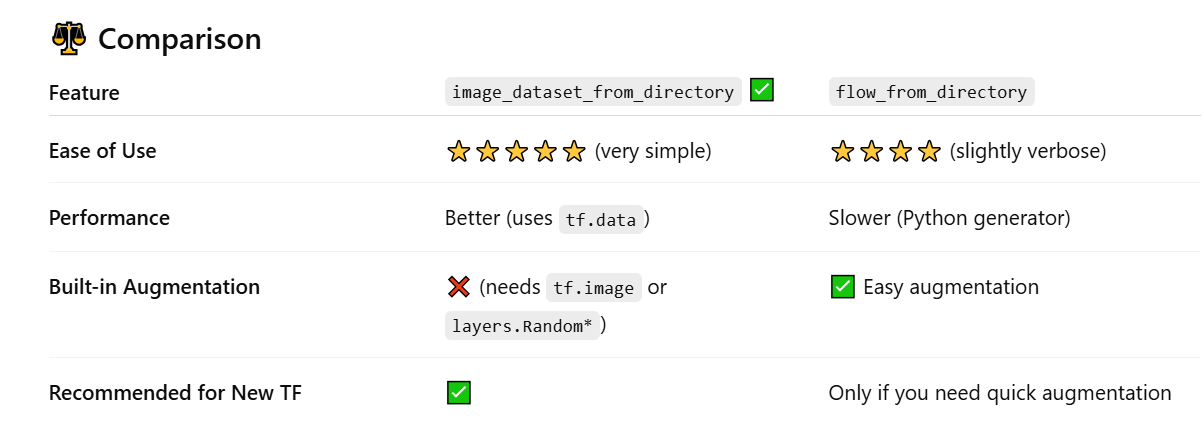

In [5]:
# Here we are using the new way 

train_dataset = tensorflow.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(224,224),
    shuffle=True,
    seed=123
)

test_dataset = tensorflow.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    labels = 'inferred',
    label_mode='int',
    batch_size=32,
    image_size=(224,224),
    shuffle=False,
    seed=123
)


valid_dataset = tensorflow.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    labels = 'inferred',
    label_mode='int',
    batch_size=32,
    image_size=(224,224),
    shuffle=True,
    seed=123
)



Found 12594 files belonging to 100 classes.


I0000 00:00:1756969509.840531      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1756969509.841232      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Found 500 files belonging to 100 classes.
Found 500 files belonging to 100 classes.


## UNDERSTANDING ABOUT LABELS AND HOW DATA IS GIVEN FOR TRAINING


In [6]:
for image,labels in train_dataset.take(2):
    print(labels)

tf.Tensor(
[98 34 94 48 57 54 46 25  0 41 31 47 48 84 29 15 94 40 10 73 15 56  1 20
 46 34 23 46 13 87 18 46], shape=(32,), dtype=int32)
tf.Tensor(
[51 34 88 33  2 69 52 17 60 17 54 16 32 38 21 71 26 65 14 93 34 54 78 65
  1 97 38  0 32 49 51  7], shape=(32,), dtype=int32)


GPT EXPLANAITON OF THE CODE

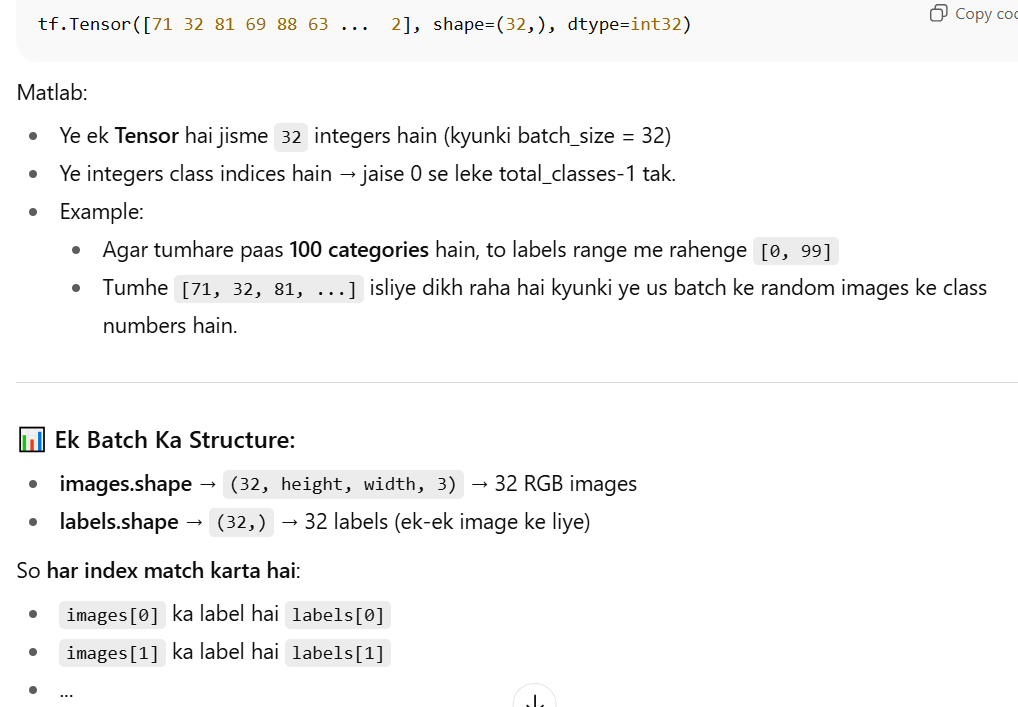

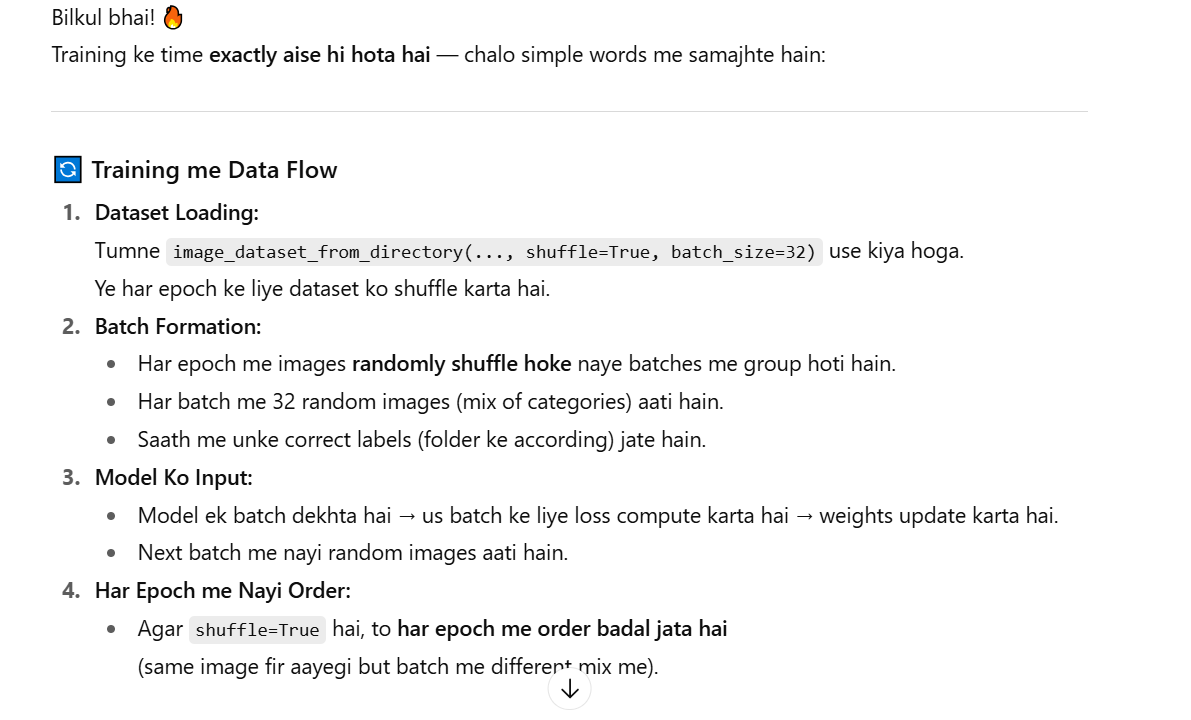
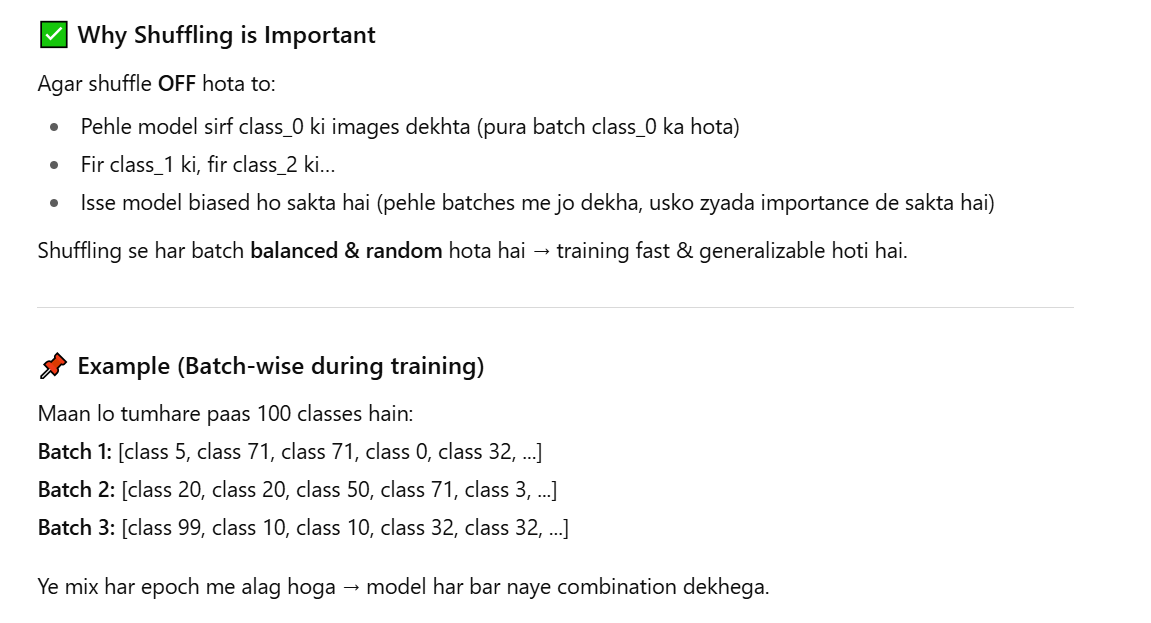

## APPLYING AUGMENTATION ON THE TRAIN DATA AND NORMALIZTION ON THE TRAIN,TEST,VALID

In [7]:
# # NORMALIZATION ON THE TRAIN, TEST AND VALID DATA

# def normalization(image,label):
#     image = tensorflow.cast(image/225.0,tensorflow.float32)
#     return image,label

# train_dataset = train_dataset.map(normalization)
# test_dataset =test_dataset.map(normalization)
# valid_dataset =valid_dataset.map(normalization)

In [8]:
## APPLYING AUGMENTATION ON THE TRAIN DATA --> if you wnat , for now i am not doing that


## 2 STAGES OF FINE TUNING : 

## STAGE 1:-
In this stage, we are freezing all the weights of the ResNet50 model , as this architecture weights are trained according to the imagenet dataset with 10000 categories

In [9]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import models,layers

## creating a base model ,applying stage 1 fine tuning 

base_model =  ResNet50(
    weights = 'imagenet',
    include_top=False, # menas not considering the last ann layers as it is acc to imagenet dataset,10000 output
    classes=100,
    pooling='avg',
    input_shape=(224,224,3)
)

# freezing all the layers weights of rsnet50
for layer in base_model.layers:
    layer.trainable =False

model = Sequential()

model.add(base_model)
model.add(Flatten())
# model.add(Dense(1024,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100,activation='softmax'))

          



94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [10]:
## compiling the model

from tensorflow.keras.optimizers import Adam
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'],optimizer=Adam(learning_rate=0.00001))

In [11]:
## fitting teh model
stage1_history = model.fit(train_dataset,epochs=15,validation_data=valid_dataset)

Epoch 1/15


I0000 00:00:1756969539.904988     128 service.cc:148] XLA service 0x7946b404d090 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1756969539.906062     128 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1756969539.906088     128 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1756969541.565238     128 cuda_dnn.cc:529] Loaded cuDNN version 90300


  2/394 ━━━━━━━━━━━━━━━━━━━━ 30s 78ms/step - accuracy: 0.0000e+00 - loss: 6.0600   

I0000 00:00:1756969546.830773     128 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


394/394 ━━━━━━━━━━━━━━━━━━━━ 60s 108ms/step - accuracy: 0.0124 - loss: 5.3723 - val_accuracy: 0.0500 - val_loss: 4.3660
Epoch 2/15
394/394 ━━━━━━━━━━━━━━━━━━━━ 31s 80ms/step - accuracy: 0.0399 - loss: 4.4809 - val_accuracy: 0.1440 - val_loss: 3.9678
Epoch 3/15
394/394 ━━━━━━━━━━━━━━━━━━━━ 32s 82ms/step - accuracy: 0.0982 - loss: 4.0824 - val_accuracy: 0.3260 - val_loss: 3.5689
Epoch 4/15
394/394 ━━━━━━━━━━━━━━━━━━━━ 33s 84ms/step - accuracy: 0.1677 - loss: 3.7129 - val_accuracy: 0.4440 - val_loss: 3.1569
Epoch 5/15
394/394 ━━━━━━━━━━━━━━━━━━━━ 34s 86ms/step - accuracy: 0.2452 - loss: 3.3579 - val_accuracy: 0.5300 - val_loss: 2.7631
Epoch 6/15
394/394 ━━━━━━━━━━━━━━━━━━━━ 35s 88ms/step - accuracy: 0.3084 - loss: 3.0317 - val_accuracy: 0.6100 - val_loss: 2.4171
Epoch 7/15
394/394 ━━━━━━━━━━━━━━━━━━━━ 36s 91ms/step - accuracy: 0.3684 - loss: 2.7402 - val_accuracy: 0.6520 - val_loss: 2.1361
Epoch 8/15
394/394 ━━━━━━━━━━━━━━━━━━━━ 37s 94ms/step - accuracy: 0.4253 - loss: 2.4762 - val_accura

In [17]:
## adding the early stopping and Reduce lr on pleatue and adding more epochs 

from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau

early_stopping = EarlyStopping(monitor ='val_loss',patience=5,restore_best_weights=True)

# ✅ ReduceLROnPlateau: reduce LR if validation loss plateaus
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,       # reduce LR by 20%
    patience=3,       # wait 3 epochs before reducing LR
    min_lr=1e-6       # do not go below this LR
)

In [18]:
## continue from the 15 epoch to 35 to epoch

stage1_history = model.fit(train_dataset,epochs=35,validation_data=valid_dataset,initial_epoch=15,callbacks=[early_stopping,reduce_lr])

Epoch 16/35
394/394 ━━━━━━━━━━━━━━━━━━━━ 39s 98ms/step - accuracy: 0.7539 - loss: 1.0255 - val_accuracy: 0.8500 - val_loss: 0.7574 - learning_rate: 1.0000e-05
Epoch 17/35
394/394 ━━━━━━━━━━━━━━━━━━━━ 36s 92ms/step - accuracy: 0.7498 - loss: 0.9955 - val_accuracy: 0.8520 - val_loss: 0.7276 - learning_rate: 1.0000e-05
Epoch 18/35
394/394 ━━━━━━━━━━━━━━━━━━━━ 36s 93ms/step - accuracy: 0.7605 - loss: 0.9716 - val_accuracy: 0.8520 - val_loss: 0.7033 - learning_rate: 1.0000e-05
Epoch 19/35
394/394 ━━━━━━━━━━━━━━━━━━━━ 37s 93ms/step - accuracy: 0.7627 - loss: 0.9356 - val_accuracy: 0.8620 - val_loss: 0.6802 - learning_rate: 1.0000e-05
Epoch 20/35
394/394 ━━━━━━━━━━━━━━━━━━━━ 36s 92ms/step - accuracy: 0.7762 - loss: 0.9005 - val_accuracy: 0.8680 - val_loss: 0.6583 - learning_rate: 1.0000e-05
Epoch 21/35
394/394 ━━━━━━━━━━━━━━━━━━━━ 37s 93ms/step - accuracy: 0.7769 - loss: 0.8684 - val_accuracy: 0.8740 - val_loss: 0.6363 - learning_rate: 1.0000e-05
Epoch 22/35
394/394 ━━━━━━━━━━━━━━━━━━━━ 37s 9

## Accuracy on test data after stage 1 fine tuning

In [19]:
val_loss, val_acc = model.evaluate(valid_dataset)
print(f"validation Accuracy: {val_acc:.4f}")
print(f"validation Loss: {val_loss:.4f}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.9044 - loss: 0.4945
validation Accuracy: 0.9060
validation Loss: 0.4564


In [20]:
# On the test dataset
test_loss,test_acc = model.evaluate(test_dataset)
print(f"test Accuracy: {test_acc:.4f}")
print(f"test Loss: {test_loss:.4f}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.9024 - loss: 0.4097
test Accuracy: 0.9140
test Loss: 0.3776


In [21]:
## checking visually , the accuracy of test batch 1

import numpy as np

# Take one batch from test dataset
for images, labels in test_dataset.take(2):
    predictions = model.predict(images)
    predicted_classes = np.argmax(predictions, axis=1)

    print("True labels:     ", labels.numpy())
    print("Predicted labels:", predicted_classes)


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
True labels:      [0 0 0 0 0 1 1 1 1 1 2 2 2 2 2 3 3 3 3 3 4 4 4 4 4 5 5 5 5 5 6 6]
Predicted labels: [ 0  0  0  0  0  1  1  1  1  1 79  2 92 35 61  3  3  3  3  3  4  4  4  4
  4  5  5  5  5  5  6  6]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
True labels:      [ 6  6  6  7  7  7  7  7  8  8  8  8  8  9  9  9  9  9 10 10 10 10 10 11
 11 11 11 11 12 12 12 12]
Predicted labels: [14  6  6  7  7  7  7  7  8  8  8  8  8  9  9  9  9  9 10 41 10 10 10 11
 56 11 11 11 12 12 12 12]


## STAGE 2 :-


****Here in this stage we are unfreezing some last deep layers of resnet 50 , for better weight training acc to our dataset, as the resent50 is trained on imagenet dataset, which contains 10k categories. So in order to improve the accuracy of the model we are doing fine tuning ,This stage ,is what actually called fine tuning stage.****


In [22]:
for layers in base_model.layers[-30:]:
    layers.trainable = True
    

In [23]:
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer = Adam(learning_rate=1e-5),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [24]:
## adding the early stopping and Reduce lr on pleatue and adding more epochs 

from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau

early_stopping = EarlyStopping(monitor ='val_loss',patience=5,restore_best_weights=True)

# ✅ ReduceLROnPlateau: reduce LR if validation loss plateaus
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,       # reduce LR by 20%
    patience=3,       # wait 3 epochs before reducing LR
    min_lr=1e-6       # do not go below this LR
)

In [25]:
stage2_history = model.fit(train_dataset,validation_data = valid_dataset,callbacks=[early_stopping,reduce_lr],epochs=20)

Epoch 1/20
394/394 ━━━━━━━━━━━━━━━━━━━━ 87s 158ms/step - accuracy: 0.7607 - loss: 0.9491 - val_accuracy: 0.9240 - val_loss: 0.3706 - learning_rate: 1.0000e-05
Epoch 2/20
394/394 ━━━━━━━━━━━━━━━━━━━━ 53s 134ms/step - accuracy: 0.8800 - loss: 0.4776 - val_accuracy: 0.9240 - val_loss: 0.3170 - learning_rate: 1.0000e-05
Epoch 3/20
394/394 ━━━━━━━━━━━━━━━━━━━━ 52s 132ms/step - accuracy: 0.9047 - loss: 0.3704 - val_accuracy: 0.9340 - val_loss: 0.2808 - learning_rate: 1.0000e-05
Epoch 4/20
394/394 ━━━━━━━━━━━━━━━━━━━━ 53s 133ms/step - accuracy: 0.9278 - loss: 0.2948 - val_accuracy: 0.9420 - val_loss: 0.2610 - learning_rate: 1.0000e-05
Epoch 5/20
394/394 ━━━━━━━━━━━━━━━━━━━━ 52s 132ms/step - accuracy: 0.9438 - loss: 0.2293 - val_accuracy: 0.9480 - val_loss: 0.2372 - learning_rate: 1.0000e-05
Epoch 6/20
394/394 ━━━━━━━━━━━━━━━━━━━━ 52s 133ms/step - accuracy: 0.9583 - loss: 0.1862 - val_accuracy: 0.9460 - val_loss: 0.2255 - learning_rate: 1.0000e-05
Epoch 7/20
394/394 ━━━━━━━━━━━━━━━━━━━━ 52s 13

## Accuracy on test dataset after stage 2 of transferlearning + fine tuning our model

In [26]:
# On the test dataset
test_loss,test_acc = model.evaluate(test_dataset)
print(f"test Accuracy: {test_acc:.4f}")
print(f"test Loss: {test_loss:.4f}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.9470 - loss: 0.1349
test Accuracy: 0.9540
test Loss: 0.1285


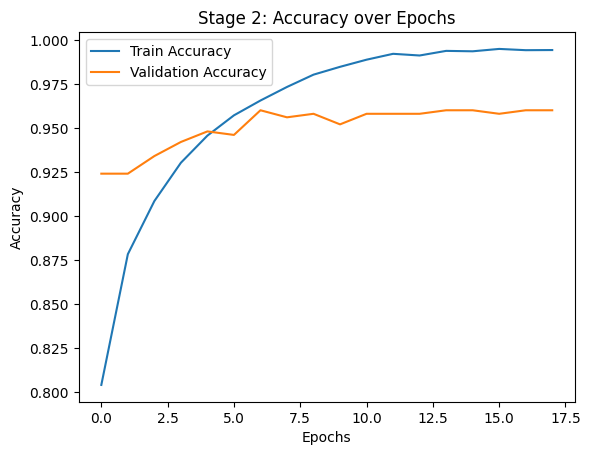

In [27]:
import matplotlib.pyplot as plt

plt.plot(stage2_history.history['accuracy'], label='Train Accuracy')
plt.plot(stage2_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Stage 2: Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


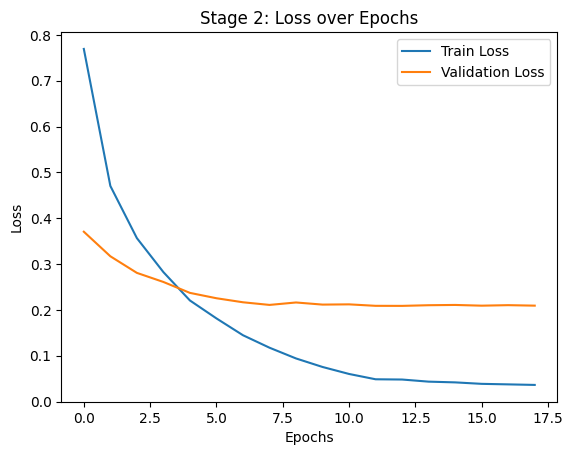

In [28]:
plt.plot(stage2_history.history['loss'], label='Train Loss')
plt.plot(stage2_history.history['val_loss'], label='Validation Loss')
plt.title('Stage 2: Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [31]:
from tensorflow.keras.models import load_model

# Load the old .h5 file
model = load_model("/kaggle/working/stage2_resnet_model.h5", compile=False)
print("✅ Model loaded successfully")


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = '/kaggle/working/stage2_resnet_model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [30]:
# Save in new format
model.save("/kaggle/working/stage2_resnet_model.keras", save_format="keras")
print("✅ Model saved as .keras")


✅ Model saved as .keras


In [ ]:
# Save in new format
model.save("/kaggle/working/stage2_resnet_model.h5", save_format="keras")
print("✅ Model saved as .keras")


In [32]:
from tensorflow.keras.models import load_model

# Agar tumhare paas model variable hai to directly save kar do
# Otherwise pehle load karo .keras / trained model ko, phir save .h5 me

# ✅ Agar model pehle se loaded hai:
model.save("/kaggle/working/stage2_resnet_model.h5", save_format="h5")
print("✅ Model saved as .h5")


✅ Model saved as .h5
